# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']

# count number of disasters in each year for each subgroup
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()

# save index of years
meteorological_disaster_counts_index = meteorological_disaster_counts.index

# sum costs by year
meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum()
meteorological_costs = meteorological_costs.squeeze()

# SPLIT METEOROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in meteorological_data['Disaster Type'].unique():
    print(dtype)

Storm
Extreme temperature


In [5]:
# display unique types
for dtype in meteorological_data['Disaster Subtype'].unique():
    print(dtype)

Tropical cyclone
<NA>
Convective storm
Cold wave
Heat wave
Severe winter conditions
Extra-tropical storm


In [6]:
# create new dataframes for each type
storm_data = meteorological_data[meteorological_data['Disaster Type'] == 'Storm']
extreme_temp_data = meteorological_data[meteorological_data['Disaster Type'] == 'Extreme temperature']
#cold_wave_data = meteorological_data[meteorological_data['Disaster Subtype'] == 'Cold wave']
#heat_wave_data = meteorological_data[meteorological_data['Disaster Subtype'] == 'Heat wave']

# count number of disasters in each year for each subgroup
storm_disaster_counts = storm_data['Year'].value_counts().sort_index()
extreme_temp_disaster_counts = extreme_temp_data['Year'].value_counts().sort_index()
#cold_wave_disaster_counts = cold_wave_data['Year'].value_counts().sort_index()
#heat_wave_disaster_counts = heat_wave_data['Year'].value_counts().sort_index()

# save index of years
storm_disaster_counts_index = storm_disaster_counts.index
extreme_temp_disaster_counts_index = extreme_temp_disaster_counts.index
#cold_wave_disaster_counts_index = cold_wave_disaster_counts.index
#heat_wave_disaster_counts_index = heat_wave_disaster_counts.index

# PLOT METEOROLOGICAL DISASTERS

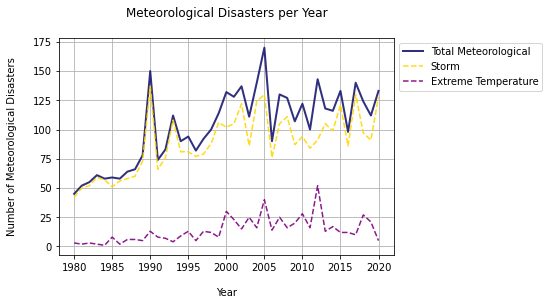

In [7]:
# single line plot

plt.grid(axis = 'both')
plt.title("Meteorological Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Meteorological Disasters\n")
plt.plot(meteorological_disaster_counts_index,meteorological_disaster_counts, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
plt.plot(storm_disaster_counts_index, storm_disaster_counts, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
plt.plot(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

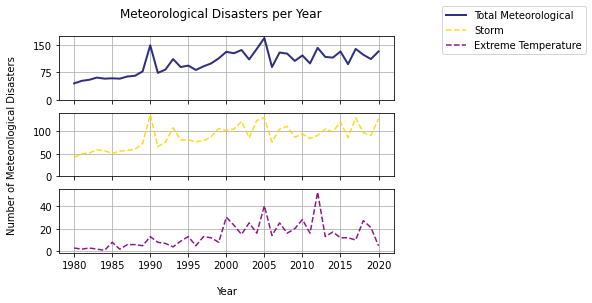

In [8]:
# multiple line plots

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disasters per Year\n")
axs[1].set_ylabel("Number of Meteorological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
axs[1].plot(storm_disaster_counts_index, storm_disaster_counts, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].plot(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,100,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

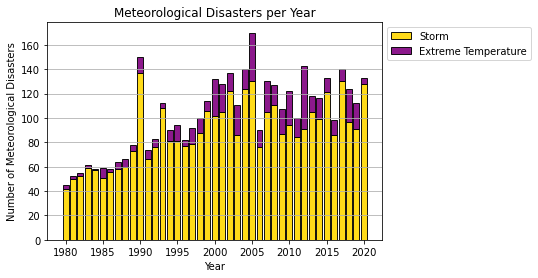

In [9]:
# single bar chart

plt.grid(axis = 'y')
plt.title("Meteorological Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Meteorological Disasters")

plt.bar(storm_disaster_counts_index, storm_disaster_counts, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
plt.bar(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, bottom = storm_disaster_counts, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

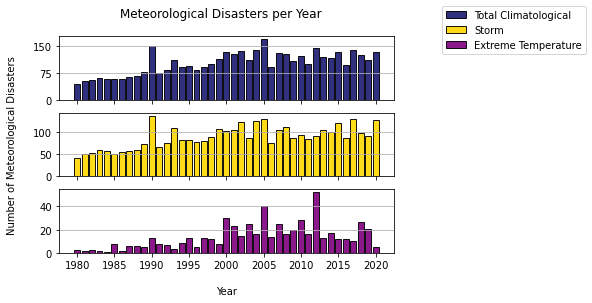

In [10]:
# multiple bar charts

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Disasters per Year\n")
axs[1].set_ylabel("Number of Meteorological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(meteorological_disaster_counts_index, meteorological_disaster_counts, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Total Climatological')
axs[1].bar(storm_disaster_counts_index, storm_disaster_counts, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].bar(extreme_temp_disaster_counts_index, extreme_temp_disaster_counts, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,150,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,100,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# BOXPLOT METEOROLOGICAL DISASTERS BY DECADE

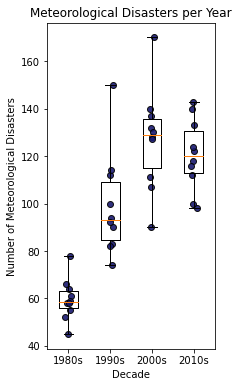

In [11]:
# BOXPLOT TOTAL METEOROLOGICAL DATA

total_box_data = [meteorological_disaster_counts[0:10], meteorological_disaster_counts[10:20], meteorological_disaster_counts[20:30], meteorological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Meteorological Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Meteorological Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalDisastersPerYearBOX.png", bbox_inches='tight')

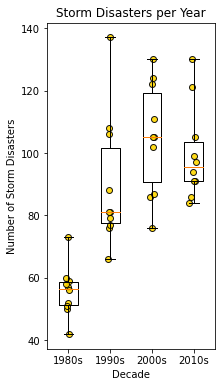

In [12]:
# BOXPLOT STORM DATA

total_box_data = [storm_disaster_counts[0:10], storm_disaster_counts[10:20], storm_disaster_counts[20:30], storm_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Storm Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Storm Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormsPerYearBOX.png", bbox_inches='tight')

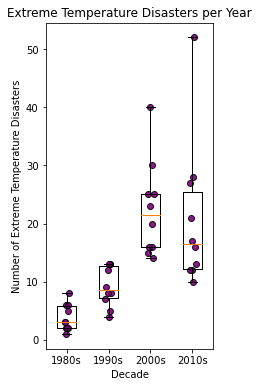

In [13]:
# BOXPLOT EXTREME TEMPERATURE DATA

total_box_data = [extreme_temp_disaster_counts[0:10], extreme_temp_disaster_counts[10:20], extreme_temp_disaster_counts[20:30], extreme_temp_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Extreme Temperature Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Extreme Temperature Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureDisastersPerYearBOX.png", bbox_inches='tight')

# ANALYZE METEOROLOGICAL DISASTER OCCURANCES

In [14]:
# METEOROLOGICAL DISASTER ANALYSIS

print("METEOROLOGICAL DISASTER ANALYSIS")

# meteorological statistical data
print("\nTotal Meteorological Statistical Data: ")
print(meteorological_disaster_counts.describe())

# 1980s meteorological statistical data
print("\n1980s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[0:10].describe())

# 1990s meteorological statistical data
print("\n1990s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[10:20].describe())

# 2000s meteorological statistical data
print("\n2000s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[20:30].describe())

# 2010s meteorological statistical data
print("\n2010s Meteorological Statistical Data: ")
print(meteorological_disaster_counts[30:40].describe())

print("\n")

# meteorological statistical changes 1980s-2010s

meteorological_mean_1980s = meteorological_disaster_counts[0:10].mean()
meteorological_mean_2010s = meteorological_disaster_counts[30:40].mean()
mean_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_2010s-meteorological_mean_1980s)/meteorological_mean_1980s
print("Mean Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_meteorological_1980_to_2020))

meteorological_max_1980s = meteorological_disaster_counts[0:10].max()
meteorological_max_2010s = meteorological_disaster_counts[30:40].max()
max_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

meteorological_min_1980s = meteorological_disaster_counts[0:10].min()
meteorological_min_2010s = meteorological_disaster_counts[30:40].min()
min_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min Meteorological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_meteorological_1980_to_2020))

meteorological_std_1980s = meteorological_disaster_counts[0:10].std()
meteorological_std_2010s = meteorological_disaster_counts[30:40].std()
std_percent_change_meteorological_1980_to_2020 = 100*(meteorological_std_2010s-meteorological_std_1980s)/meteorological_std_1980s
print("Standard Deviation of Meteorological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_meteorological_1980_to_2020))

METEOROLOGICAL DISASTER ANALYSIS

Total Meteorological Statistical Data: 
count     41.000000
mean     102.390244
std       31.664553
min       45.000000
25%       78.000000
50%      107.000000
75%      128.000000
max      170.000000
Name: Year, dtype: float64

1980s Meteorological Statistical Data: 
count    10.000000
mean     59.600000
std       8.809086
min      45.000000
25%      55.750000
50%      58.500000
75%      63.250000
max      78.000000
Name: Year, dtype: float64

1990s Meteorological Statistical Data: 
count     10.000000
mean      99.100000
std       21.911184
min       74.000000
25%       84.750000
50%       93.000000
75%      109.000000
max      150.000000
Name: Year, dtype: float64

2000s Meteorological Statistical Data: 
count     10.000000
mean     127.200000
std       21.544785
min       90.000000
25%      115.000000
50%      129.000000
75%      135.750000
max      170.000000
Name: Year, dtype: float64

2010s Meteorological Statistical Data: 
count     10.000000
me

In [15]:
# STORM DISASTER ANALYSIS

print("STORM DISASTER ANALYSIS")

# storm statistical data
print("\nTotal Storm Statistical Data: ")
print(storm_disaster_counts.describe())

# 1980s storm statistical data
print("\n1980s Storm Statistical Data: ")
print(storm_disaster_counts[0:10].describe())

# 1990s storm statistical data
print("\n1990s Storm Statistical Data: ")
print(storm_disaster_counts[10:20].describe())

# 2000s storm statistical data
print("\n2000s Storm Statistical Data: ")
print(storm_disaster_counts[20:30].describe())

# 2010s storm statistical data
print("\n2010s Storm Statistical Data: ")
print(storm_disaster_counts[30:40].describe())

print("\n")

# storm statistical changes 1980s-2010s

storm_mean_1980s = storm_disaster_counts[0:10].mean()
storm_mean_2010s = storm_disaster_counts[30:40].mean()
mean_percent_change_storm_1980_to_2020 = 100*(storm_mean_2010s-storm_mean_1980s)/storm_mean_1980s
print("Mean Storm Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_storm_1980_to_2020))

storm_max_1980s = storm_disaster_counts[0:10].max()
storm_max_2010s = storm_disaster_counts[30:40].max()
max_percent_change_storm_1980_to_2020 = 100*(meteorological_max_2010s-meteorological_max_1980s)/meteorological_max_1980s
print("Max Storm Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_meteorological_1980_to_2020))

storm_min_1980s = storm_disaster_counts[0:10].min()
storm_min_2010s = storm_disaster_counts[30:40].min()
min_percent_change_storm_1980_to_2020 = 100*(meteorological_min_2010s-meteorological_min_1980s)/meteorological_min_1980s
print("Min Storm Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_meteorological_1980_to_2020))

storm_std_1980s = storm_disaster_counts[0:10].std()
storm_std_2010s = storm_disaster_counts[30:40].std()
std_percent_change_storm_1980_to_2020 = 100*(storm_std_2010s-storm_std_1980s)/storm_std_1980s
print("Standard Deviation of Storm Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_storm_1980_to_2020))

STORM DISASTER ANALYSIS

Total Storm Statistical Data: 
count     41.000000
mean      88.560976
std       25.340727
min       42.000000
25%       73.000000
50%       87.000000
75%      105.000000
max      137.000000
Name: Year, dtype: float64

1980s Storm Statistical Data: 
count    10.00000
mean     55.80000
std       8.10761
min      42.00000
25%      51.25000
50%      56.50000
75%      58.75000
max      73.00000
Name: Year, dtype: float64

1990s Storm Statistical Data: 
count     10.00000
mean      89.90000
std       21.12634
min       66.00000
25%       77.50000
50%       81.00000
75%      101.50000
max      137.00000
Name: Year, dtype: float64

2000s Storm Statistical Data: 
count     10.000000
mean     104.800000
std       17.781389
min       76.000000
25%       90.750000
50%      105.000000
75%      119.250000
max      130.000000
Name: Year, dtype: float64

2010s Storm Statistical Data: 
count     10.000000
mean      99.800000
std       15.002222
min       84.000000
25%       91

In [16]:
# EXTREME TEMPERATURE DISASTER ANALYSIS

print("EXTREME TEMPERATURE DISASTER ANALYSIS")

# extreme temperature statistical data
print("\nTotal Extreme Temperature Statistical Data: ")
print(extreme_temp_disaster_counts.describe())

# 1980s extreme temperature statistical data
print("\n1980s Extreme Temperature Statistical Data: ")
print(extreme_temp_disaster_counts[0:10].describe())

# 1990s extreme temperature statistical data
print("\n1990s Extreme Temperature Statistical Data: ")
print(extreme_temp_disaster_counts[10:20].describe())

# 2000s extreme temperature statistical data
print("\n2000s Extreme Temperature Statistical Data: ")
print(extreme_temp_disaster_counts[20:30].describe())

# 2010s extreme temperature statistical data
print("\n2010s Extreme Temperature Statistical Data: ")
print(extreme_temp_disaster_counts[30:40].describe())

print("\n")

# extreme temperature statistical changes 1980s-2010s

extreme_temp_mean_1980s = extreme_temp_disaster_counts[0:10].mean()
extreme_temp_mean_2010s = extreme_temp_disaster_counts[30:40].mean()
mean_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_mean_2010s-extreme_temp_mean_1980s)/extreme_temp_mean_1980s
print("Mean Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_extreme_temp_1980_to_2020))

extreme_temp_max_1980s = extreme_temp_disaster_counts[0:10].max()
extreme_temp_max_2010s = extreme_temp_disaster_counts[30:40].max()
max_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_max_2010s-extreme_temp_max_1980s)/extreme_temp_max_1980s
print("Max Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_extreme_temp_1980_to_2020))

extreme_temp_min_1980s = extreme_temp_disaster_counts[0:10].min()
extreme_temp_min_2010s = extreme_temp_disaster_counts[30:40].min()
min_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_min_2010s-extreme_temp_min_1980s)/extreme_temp_min_1980s
print("Min Extreme Temperature Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_extreme_temp_1980_to_2020))

extreme_temp_std_1980s = extreme_temp_disaster_counts[0:10].std()
extreme_temp_std_2010s = extreme_temp_disaster_counts[30:40].std()
std_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_std_2010s-extreme_temp_std_1980s)/extreme_temp_std_1980s
print("Standard Deviation of Extreme Temperature Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_extreme_temp_1980_to_2020))

EXTREME TEMPERATURE DISASTER ANALYSIS

Total Extreme Temperature Statistical Data: 
count    41.000000
mean     13.829268
std      10.837210
min       1.000000
25%       6.000000
50%      12.000000
75%      17.000000
max      52.000000
Name: Year, dtype: float64

1980s Extreme Temperature Statistical Data: 
count    10.000000
mean      3.800000
std       2.299758
min       1.000000
25%       2.000000
50%       3.000000
75%       5.750000
max       8.000000
Name: Year, dtype: float64

1990s Extreme Temperature Statistical Data: 
count    10.000000
mean      9.200000
std       3.392803
min       4.000000
25%       7.250000
50%       8.500000
75%      12.750000
max      13.000000
Name: Year, dtype: float64

2000s Extreme Temperature Statistical Data: 
count    10.000000
mean     22.400000
std       8.126773
min      14.000000
25%      16.000000
50%      21.500000
75%      25.000000
max      40.000000
Name: Year, dtype: float64

2010s Extreme Temperature Statistical Data: 
count    10.0000

# METEOROLOGICAL DISASTER COSTS

In [17]:
storm_costs = storm_data[['Year', 'Total Damages']]
storm_costs = storm_costs.groupby('Year').sum()
storm_costs = storm_costs.squeeze()

extreme_temp_costs = extreme_temp_data[['Year', 'Total Damages']]
extreme_temp_costs = extreme_temp_costs.groupby('Year').sum()
extreme_temp_costs = extreme_temp_costs.squeeze()
extreme_temp_costs[2016] = 0
extreme_temp_costs = extreme_temp_costs.sort_index()

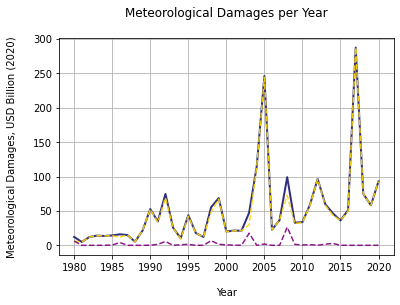

In [18]:
# single line plot

plt.grid(axis = 'both')
plt.title("Meteorological Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Meteorological Damages, USD Billion (2020)\n")
plt.plot(meteorological_costs.index, meteorological_costs, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
plt.plot(storm_costs.index, storm_costs, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
plt.plot(extreme_temp_costs.index, extreme_temp_costs, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

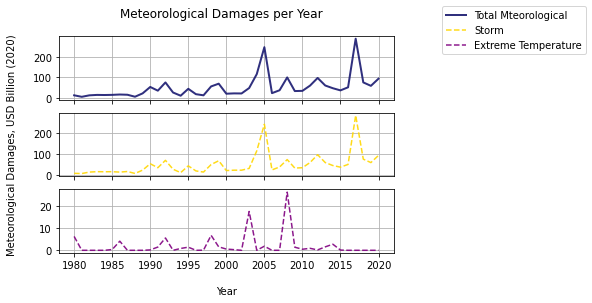

In [19]:
# multiple line plots

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Damages per Year\n")
axs[1].set_ylabel("Meteorological Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(meteorological_costs.index, meteorological_costs, linewidth=2, color = 'midnightblue', alpha = 0.9, label = 'Total Mteorological')
axs[1].plot(storm_costs.index, storm_costs, linestyle = '--', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].plot(extreme_temp_costs.index, extreme_temp_costs, linestyle = '--', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

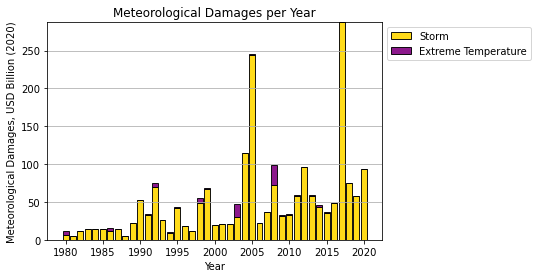

In [20]:
# single bar chart

plt.grid(axis = 'y')
plt.title("Meteorological Damages per Year")
plt.xlabel("Year")
plt.ylabel("Meteorological Damages, USD Billion (2020)")

plt.bar(storm_costs.index, storm_costs, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
plt.bar(extreme_temp_costs.index, extreme_temp_costs, bottom = storm_costs, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

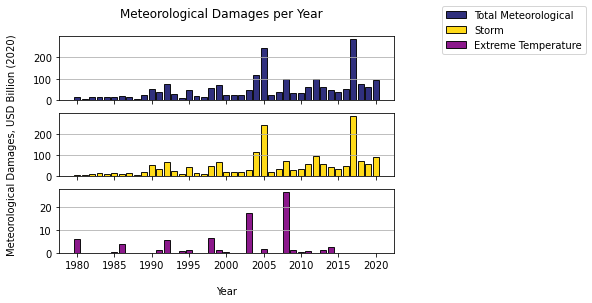

In [21]:
# multiple bar charts

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Meteorological Damages per Year\n")
axs[1].set_ylabel("Meteorological Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(meteorological_costs.index, meteorological_costs, edgecolor = 'black', color = 'midnightblue', alpha = 0.9, label = 'Total Meteorological')
axs[1].bar(storm_costs.index, storm_costs, edgecolor = 'black', color = 'gold', alpha = 0.9, label = 'Storm')
axs[2].bar(extreme_temp_costs.index, extreme_temp_costs, edgecolor = 'black', color = 'purple', alpha = 0.9, label = 'Extreme Temperature')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.sca(axs[0])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,200,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# BOXPLOT METEOROLOGICAL DAMAGES BY DECADE

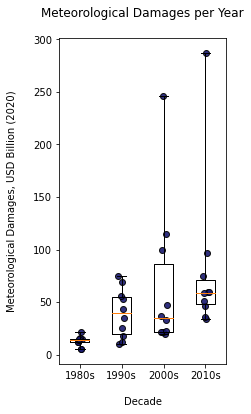

In [22]:
# BOXPLOT TOTAL METEOROLOGICAL COST DATA

meteorological_box_data = [meteorological_costs[0:10], meteorological_costs[10:20], meteorological_costs[20:30], meteorological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Meteorological Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Meteorological Damages, USD Billion (2020)\n")

plt.boxplot(meteorological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,meteorological_box_data[0], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,meteorological_box_data[1], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,meteorological_box_data[2], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,meteorological_box_data[3], color = 'midnightblue', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/meteorologicalCostsPerYearBOX.png", bbox_inches='tight')

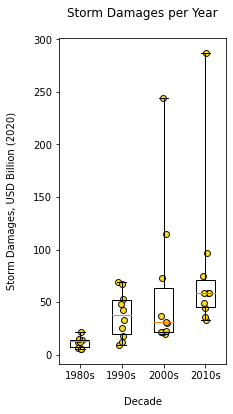

In [23]:
# BOXPLOT STORM COST DATA

storm_box_data = [storm_costs[0:10], storm_costs[10:20], storm_costs[20:30], storm_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Storm Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Storm Damages, USD Billion (2020)\n")

plt.boxplot(storm_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,storm_box_data[0], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,storm_box_data[1], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,storm_box_data[2], color = 'gold', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,storm_box_data[3], color = 'gold', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/stormCostsPerYearBOX.png", bbox_inches='tight')

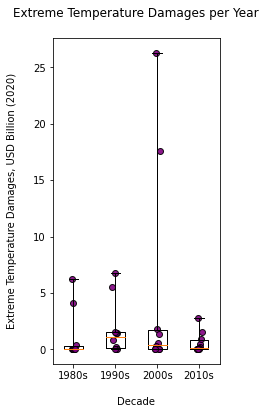

In [24]:
# BOXPLOT EXTREME TEMPERATURE COST DATA

extreme_temp_box_data = [extreme_temp_costs[0:10], extreme_temp_costs[10:20], extreme_temp_costs[20:30], extreme_temp_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Extreme Temperature Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Extreme Temperature Damages, USD Billion (2020)\n")

plt.boxplot(extreme_temp_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,extreme_temp_box_data[0], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,extreme_temp_box_data[1], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,extreme_temp_box_data[2], color = 'purple', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,extreme_temp_box_data[3], color = 'purple', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Meteorological Disasters/meteorological figures/extremeTemperatureCostsPerYearBOX.png", bbox_inches='tight')

# ANALYZE DISASTER COSTS

In [25]:
# METEOROLOGICAL DISASTER COST ANALYSIS

print("METEOROLOGICAL DISASTER COST ANALYSIS")

# meteorological costs statistical data
print("\nTotal Meteorological Costs Statistical Data: ")
print(meteorological_costs.describe())

# 1980s meteorological costs statistical data
print("\n1980s Meteorological Costs Statistical Data: ")
print(meteorological_costs[0:10].describe())

# 1990s meteorological costs statistical data
print("\n1990s Meteorological Costs Statistical Data: ")
print(meteorological_costs[10:20].describe())

# 2000s meteorological costs statistical data
print("\n2000s Meteorological Costs Statistical Data: ")
print(meteorological_costs[20:30].describe())

# 2010s meteorological costs statistical data
print("\n2010s Meteorological Costs Statistical Data: ")
print(meteorological_costs[30:40].describe())

print("\n")

# meteorological costs statistical changes 1980s-2010s
meteorological_mean_costs_1980s = meteorological_costs[0:10].mean()
meteorological_mean_costs_2010s = meteorological_costs[30:40].mean()
mean_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_mean_costs_2010s-meteorological_mean_costs_1980s)/meteorological_mean_costs_1980s
print("Mean Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_meteorological_1980_to_2020))

meteorological_max_costs_1980s = meteorological_costs[0:10].max()
meteorological_max_costs_2010s = meteorological_costs[30:40].max()
max_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_max_costs_2010s-meteorological_max_costs_1980s)/meteorological_max_costs_1980s
print("Max Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_meteorological_1980_to_2020))

meteorological_min_costs_1980s = meteorological_costs[0:10].min()
meteorological_min_costs_2010s = meteorological_costs[30:40].min()
min_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_min_costs_2010s-meteorological_min_costs_1980s)/meteorological_min_costs_1980s
print("Min Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_meteorological_1980_to_2020))

meteorological_std_costs_1980s = meteorological_costs[0:10].std()
meteorological_std_costs_2010s = meteorological_costs[30:40].std()
std_costs_percent_change_meteorological_1980_to_2020 = 100*(meteorological_std_costs_2010s-meteorological_std_costs_1980s)/meteorological_std_costs_1980s
print("Standard Deviation of Meteorological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_meteorological_1980_to_2020))

METEOROLOGICAL DISASTER COST ANALYSIS

Total Meteorological Costs Statistical Data: 
count     41.000000
mean      50.812162
std       57.079535
min        4.901970
25%       16.020657
50%       34.682344
75%       59.243479
max      287.256788
Name: Total Damages, dtype: float64

1980s Meteorological Costs Statistical Data: 
count    10.000000
mean     12.898211
std       4.895956
min       4.901970
25%      12.073083
50%      13.862893
75%      14.776082
max      21.548437
Name: Total Damages, dtype: float64

1990s Meteorological Costs Statistical Data: 
count    10.000000
mean     39.558125
std      23.150898
min      10.249165
25%      19.692493
50%      39.215546
75%      54.641160
max      74.696982
Name: Total Damages, dtype: float64

2000s Meteorological Costs Statistical Data: 
count     10.000000
mean      66.250009
std       71.633825
min       19.970988
25%       21.776088
50%       34.803095
75%       86.185080
max      245.993409
Name: Total Damages, dtype: float64

2010s

In [26]:
# STORM DISASTER COST ANALYSIS

print("STORM DISASTER COST ANALYSIS")

# storm costs statistical data
print("\nTotal Storm Costs Statistical Data: ")
print(storm_costs.describe())

# 1980s storm costs statistical data
print("\n1980s Storm Costs Statistical Data: ")
print(storm_costs[0:10].describe())

# 1990s storm costs statistical data
print("\n1990s Storm Costs Statistical Data: ")
print(storm_costs[10:20].describe())

# 2000s storm costs statistical data
print("\n2000s Storm Costs Statistical Data: ")
print(storm_costs[20:30].describe())

# 2010s storm costs statistical data
print("\n2010s Storm Costs Statistical Data: ")
print(storm_costs[30:40].describe())

print("\n")

# storm costs statistical changes 1980s-2010s
storm_mean_costs_1980s = storm_costs[0:10].mean()
storm_mean_costs_2010s = storm_costs[30:40].mean()
mean_costs_percent_change_storm_1980_to_2020 = 100*(storm_mean_costs_2010s-storm_mean_costs_1980s)/storm_mean_costs_1980s
print("Mean Storm Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_storm_1980_to_2020))

storm_max_costs_1980s = storm_costs[0:10].max()
storm_max_costs_2010s = storm_costs[30:40].max()
max_costs_percent_change_storm_1980_to_2020 = 100*(storm_max_costs_2010s-storm_max_costs_1980s)/storm_max_costs_1980s
print("Max Storm Disaster Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_storm_1980_to_2020))

storm_min_costs_1980s = storm_costs[0:10].min()
storm_min_costs_2010s = storm_costs[30:40].min()
min_costs_percent_change_storm_1980_to_2020 = 100*(storm_min_costs_2010s-storm_min_costs_1980s)/storm_min_costs_1980s
print("Min Storm Disaster Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_storm_1980_to_2020))

storm_std_costs_1980s = storm_costs[0:10].std()
storm_std_costs_2010s = storm_costs[30:40].std()
std_costs_percent_change_storm_1980_to_2020 = 100*(storm_std_costs_2010s-storm_std_costs_1980s)/storm_std_costs_1980s
print("Standard Deviation of Storm Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_storm_1980_to_2020))

STORM DISASTER COST ANALYSIS

Total Storm Costs Statistical Data: 
count     41.000000
mean      48.756460
std       56.745411
min        4.901970
25%       14.918641
50%       33.219939
75%       58.251598
max      287.256788
Name: Total Damages, dtype: float64

1980s Storm Costs Statistical Data: 
count    10.000000
mean     11.824991
std       5.193640
min       4.901970
25%       7.416648
50%      12.827922
75%      14.079236
max      21.548437
Name: Total Damages, dtype: float64

1990s Storm Costs Statistical Data: 
count    10.000000
mean     37.776854
std      21.681713
min       9.422422
25%      19.692493
50%      37.778113
75%      51.527761
max      69.129585
Name: Total Damages, dtype: float64

2000s Storm Costs Statistical Data: 
count     10.000000
mean      61.455502
std       71.020941
min       19.416406
25%       21.557425
50%       30.693071
75%       63.780614
max      244.143769
Name: Total Damages, dtype: float64

2010s Storm Costs Statistical Data: 
count     10.

In [27]:
# EXTREME TEMPERATURE DISASTER COST ANALYSIS

print("EXTREME TEMPERATURE DISASTER COST ANALYSIS")

# extreme temperature costs statistical data
print("\nTotal Extreme Temperature Costs Statistical Data: ")
print(extreme_temp_costs.describe())

# 1980s extreme temperature costs statistical data
print("\n1980s Extreme Temperature Costs Statistical Data: ")
print(extreme_temp_costs[0:10].describe())

# 1990s extreme temperature costs statistical data
print("\n1990s Extreme Temperature Costs Statistical Data: ")
print(extreme_temp_costs[10:20].describe())

# 2000s extreme temperature costs statistical data
print("\n2000s Extreme Temperature Costs Statistical Data: ")
print(extreme_temp_costs[20:30].describe())

# 2010s extreme temperature costs statistical data
print("\n2010s Extreme Temperature Costs Statistical Data: ")
print(extreme_temp_costs[30:40].describe())

print("\n")

# extreme temperature costs statistical changes 1980s-2010s
extreme_temp_mean_costs_1980s = extreme_temp_costs[0:10].mean()
extreme_temp_mean_costs_2010s = extreme_temp_costs[30:40].mean()
mean_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_mean_costs_2010s-extreme_temp_mean_costs_1980s)/extreme_temp_mean_costs_1980s
print("Mean Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_extreme_temp_1980_to_2020))

extreme_temp_max_costs_1980s = extreme_temp_costs[0:10].max()
extreme_temp_max_costs_2010s = extreme_temp_costs[30:40].max()
max_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_max_costs_2010s-extreme_temp_max_costs_1980s)/extreme_temp_max_costs_1980s
print("Max Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_extreme_temp_1980_to_2020))

extreme_temp_min_costs_1980s = extreme_temp_costs[0:10].min()
extreme_temp_min_costs_2010s = extreme_temp_costs[30:40].min()
min_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_min_costs_2010s-extreme_temp_min_costs_1980s)/extreme_temp_min_costs_1980s
print("Min Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_extreme_temp_1980_to_2020))

extreme_temp_std_costs_1980s = extreme_temp_costs[0:10].std()
extreme_temp_std_costs_2010s = extreme_temp_costs[30:40].std()
std_costs_percent_change_extreme_temp_1980_to_2020 = 100*(extreme_temp_std_costs_2010s-extreme_temp_std_costs_1980s)/extreme_temp_std_costs_1980s
print("Standard Deviation of Extreme Temperature Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_extreme_temp_1980_to_2020))

EXTREME TEMPERATURE DISASTER COST ANALYSIS

Total Extreme Temperature Costs Statistical Data: 
count    41.000000
mean      2.010425
std       4.977669
min       0.000000
25%       0.000000
50%       0.171692
75%       1.462405
max      26.294309
Name: Total Damages, dtype: float64

1980s Extreme Temperature Costs Statistical Data: 
count    10.000000
mean      1.073220
std       2.232017
min       0.000000
25%       0.000000
50%       0.000000
75%       0.259367
max       6.266630
Name: Total Damages, dtype: float64

1990s Extreme Temperature Costs Statistical Data: 
count    10.000000
mean      1.781271
std       2.410394
min       0.000000
25%       0.083844
50%       1.119602
75%       1.527190
max       6.765617
Name: Total Damages, dtype: float64

2000s Extreme Temperature Costs Statistical Data: 
count    10.000000
mean      4.794507
std       9.282928
min       0.000000
25%       0.000000
50%       0.423067
75%       1.736566
max      26.294309
Name: Total Damages, dtype: float

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
